# Exploratory Data Analysis on US Funds Dataset

This notebook explores the US Funds dataset available at [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/mutual-funds-and-etfs). The dataset includes the financial information collected from Yahoo Finance and includes all U.S. Mutual Funds and ETFs. The data relates to the November 2021 financial values.

In [2]:
import pandas as pd

%config InlineBackend.figure_format = "retina"

In [3]:
etf = pd.read_csv("data/ETFs.csv")
mf = pd.read_csv("data/MutualFunds.csv")

In [4]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 142 entries, fund_symbol to fund_treynor_ratio_10years
dtypes: float64(124), int64(1), object(17)
memory usage: 2.5+ MB


In [5]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 54.1+ MB


Mutual Funds data have more entries and columns, thus the size is much bigger.

In [6]:
etf.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'fund_category', 'fund_family',
       'exchange_code', 'exchange_name',
       ...
       'fund_stdev_5years', 'fund_sharpe_ratio_5years',
       'fund_treynor_ratio_5years', 'fund_alpha_10years', 'fund_beta_10years',
       'fund_mean_annual_return_10years', 'fund_r_squared_10years',
       'fund_stdev_10years', 'fund_sharpe_ratio_10years',
       'fund_treynor_ratio_10years'],
      dtype='object', length=142)

In [7]:
mf.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'initial_investment',
       'subsequent_investment', 'fund_category', 'fund_family',
       ...
       'peer_environment_avg', 'peer_environment_max', 'social_score',
       'peer_social_min', 'peer_social_avg', 'peer_social_max',
       'governance_score', 'peer_governance_min', 'peer_governance_avg',
       'peer_governance_max'],
      dtype='object', length=298)

Mutual Funds data have more columns, such as ESG socres.

In [8]:
set(etf.columns).intersection(set(mf.columns))

{'annual_holdings_turnover',
 'asset_bonds',
 'asset_stocks',
 'category_annual_report_net_expense_ratio',
 'category_return_10years',
 'category_return_1month',
 'category_return_1year',
 'category_return_2000',
 'category_return_2001',
 'category_return_2002',
 'category_return_2003',
 'category_return_2004',
 'category_return_2005',
 'category_return_2006',
 'category_return_2007',
 'category_return_2008',
 'category_return_2009',
 'category_return_2010',
 'category_return_2011',
 'category_return_2012',
 'category_return_2013',
 'category_return_2014',
 'category_return_2015',
 'category_return_2016',
 'category_return_2017',
 'category_return_2018',
 'category_return_2019',
 'category_return_2020',
 'category_return_3months',
 'category_return_3years',
 'category_return_5years',
 'category_return_ytd',
 'currency',
 'day200_moving_average',
 'day50_moving_average',
 'exchange_code',
 'exchange_name',
 'exchange_timezone',
 'fund_alpha_10years',
 'fund_alpha_3years',
 'fund_alpha_5

They share some common columns.

In [9]:
etf = pd.read_csv("data/ETFs.csv")
mf = pd.read_csv("data/MutualFunds.csv")
etf = etf.loc[
    :,
    [
        "fund_symbol",
        "fund_short_name",
        "fund_long_name",
        "asset_bonds",
        "asset_stocks",
        "investment_type",
        "size_type",
        "quote_type",
        "fund_stdev_10years",
        "fund_stdev_5years",
        "fund_stdev_3years",
        "fund_return_10years",
        "fund_return_5years",
        "fund_return_3years",
        "fund_alpha_10years",
        "fund_alpha_3years",
        "fund_alpha_5years",
        "fund_beta_10years",
        "fund_beta_3years",
        "fund_beta_5years",
    ],
]
mf = mf.loc[
    :,
    [
        "fund_symbol",
        "fund_short_name",
        "fund_long_name",
        "asset_bonds",
        "asset_stocks",
        "investment_type",
        "size_type",
        "quote_type",
        "fund_stdev_10years",
        "fund_stdev_5years",
        "fund_stdev_3years",
        "fund_return_10years",
        "fund_return_5years",
        "fund_return_3years",
        "fund_alpha_10years",
        "fund_alpha_3years",
        "fund_alpha_5years",
        "fund_beta_10years",
        "fund_beta_3years",
        "fund_beta_5years",
    ],
]
data = pd.concat([etf, mf])
data.to_parquet("data/data.parquet", index=False)

# Summary Statistics

In [10]:
data.head(5)

,fund_symbol,fund_short_name,fund_long_name,asset_bonds,asset_stocks,investment_type,size_type,quote_type,fund_stdev_10years,fund_stdev_5years,fund_stdev_3years,fund_return_10years,fund_return_5years,fund_return_3years,fund_alpha_10years,fund_alpha_3years,fund_alpha_5years,fund_beta_10years,fund_beta_3years,fund_beta_5years
0,AAAU,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,NaN,NaN,NaN,NaN,ETF,NaN,NaN,14.93,NaN,NaN,0.1460,NaN,13.18,NaN,NaN,0.07,NaN
1,AADR,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,NaN,NaN,Blend,Large,ETF,16.78,19.30,22.42,0.0830,0.1188,0.0803,3.32,-1.30,0.38,0.96,1.11,1.11
2,AAXJ,NaN,American Century One Choice Blend+ 2015 Portfo...,NaN,NaN,Blend,Large,ETF,16.83,15.91,18.48,0.0535,0.1067,0.0804,0.30,1.20,1.89,0.99,0.90,0.94
3,ABEQ,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,NaN,NaN,Value,Large,ETF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,NaN,American Century One Choice Blend+ 2015 Portfo...,0.0,0.9992,Growth,Medium,ETF,NaN,NaN,32.60,NaN,NaN,0.4620,NaN,24.18,NaN,NaN,1.31,NaN


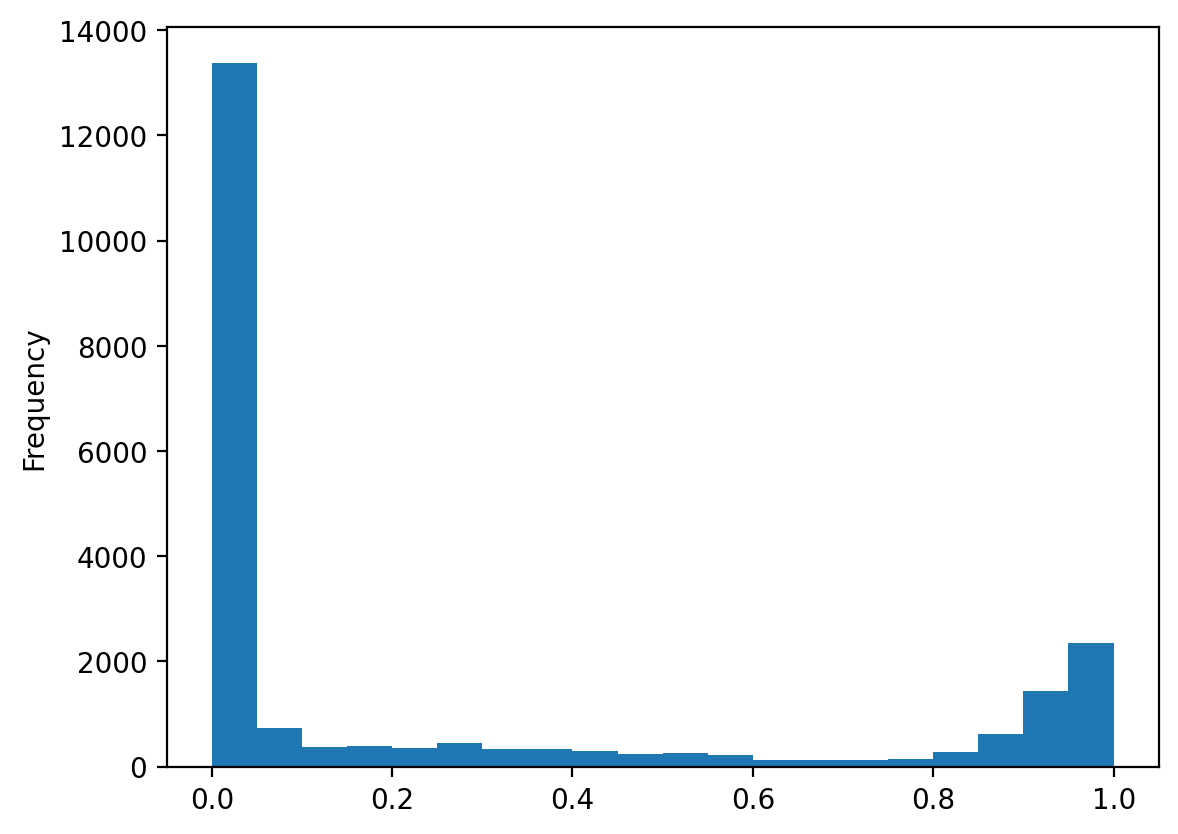

In [11]:
data.asset_bonds.plot.hist(bins=20);

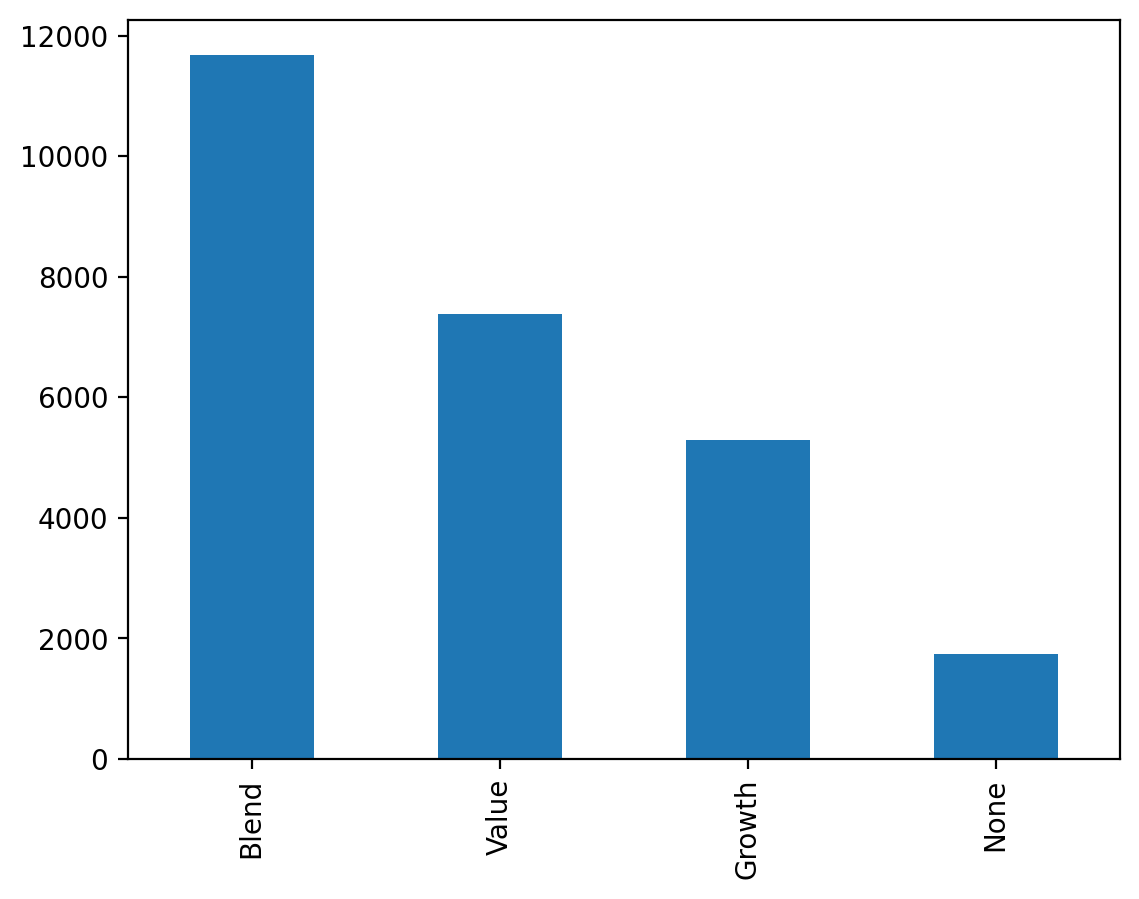

In [33]:
data.investment_type.fillna("None").value_counts().plot.bar();

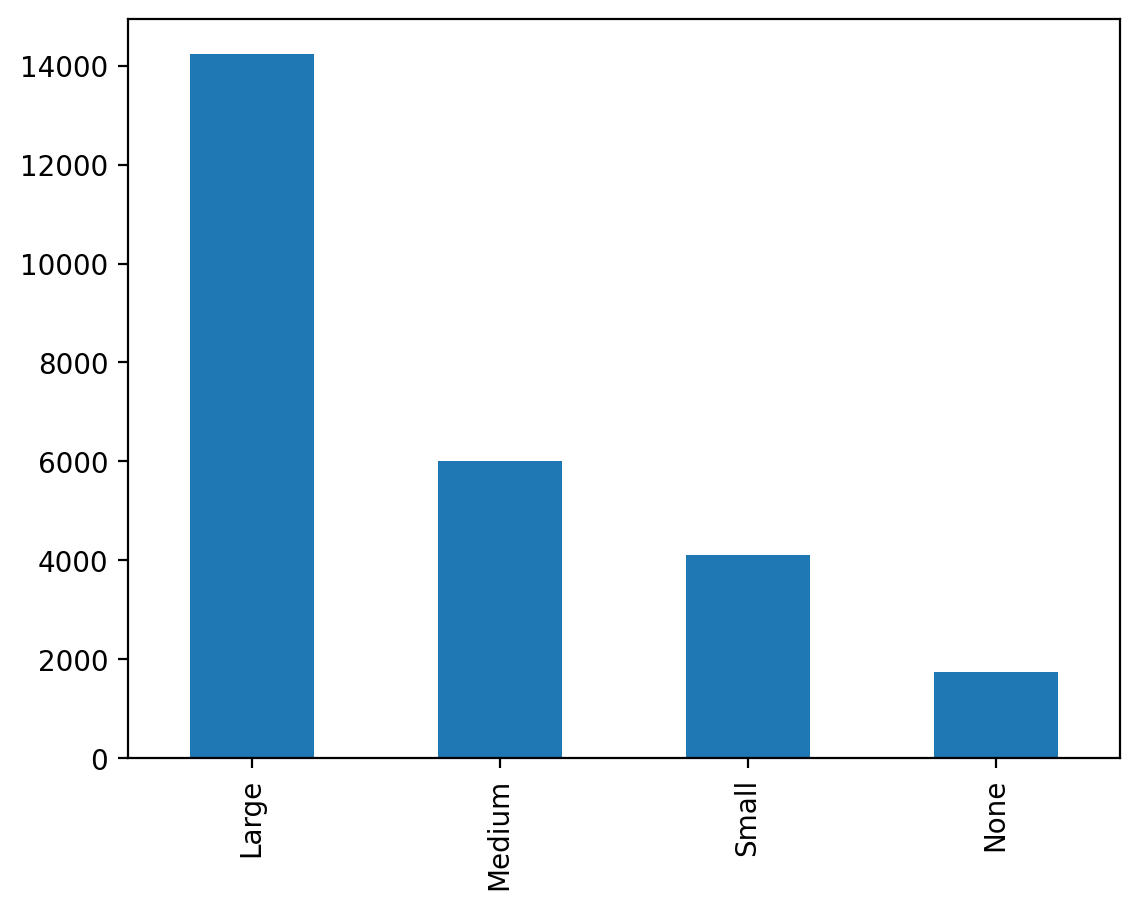

In [34]:
data.size_type.fillna("None").value_counts().plot.bar();

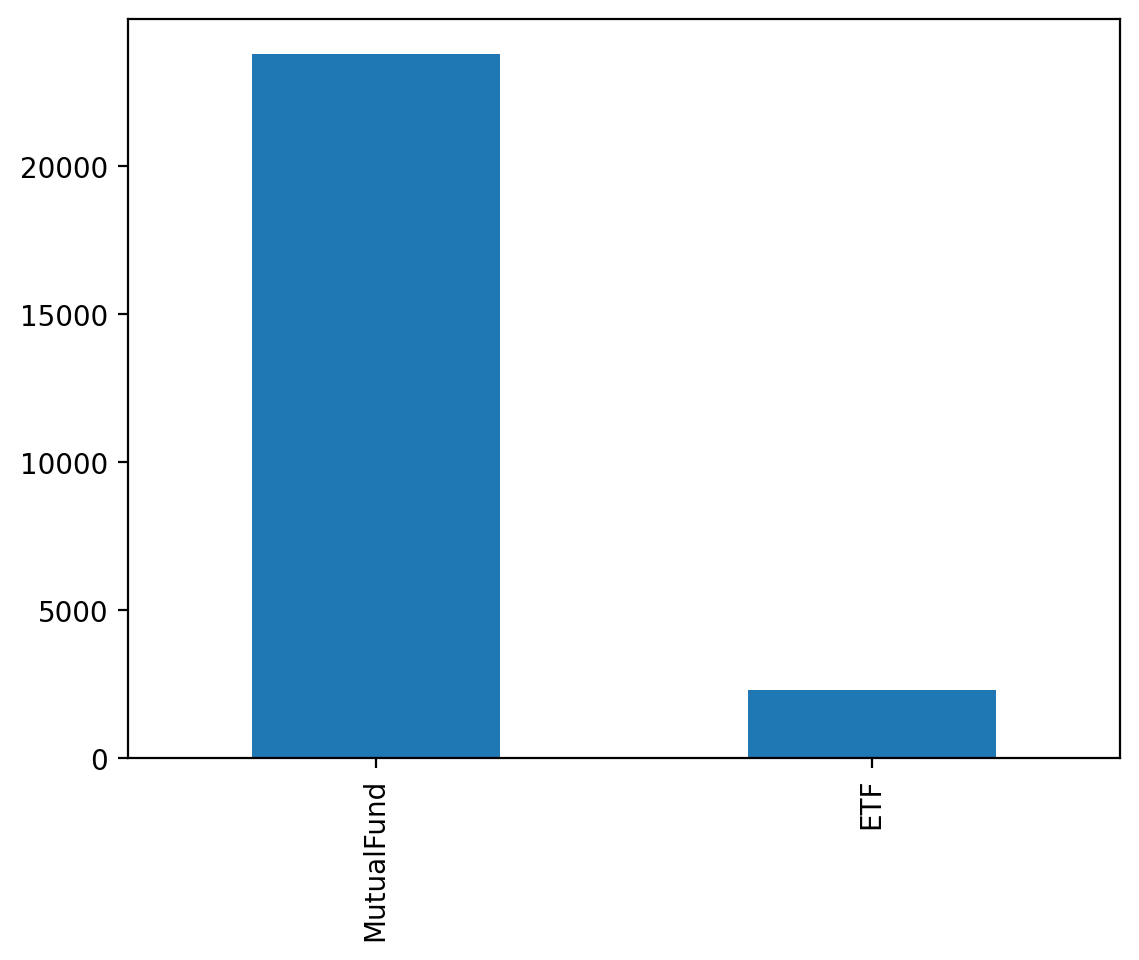

In [14]:
data.quote_type.value_counts().plot.bar();

# Returns

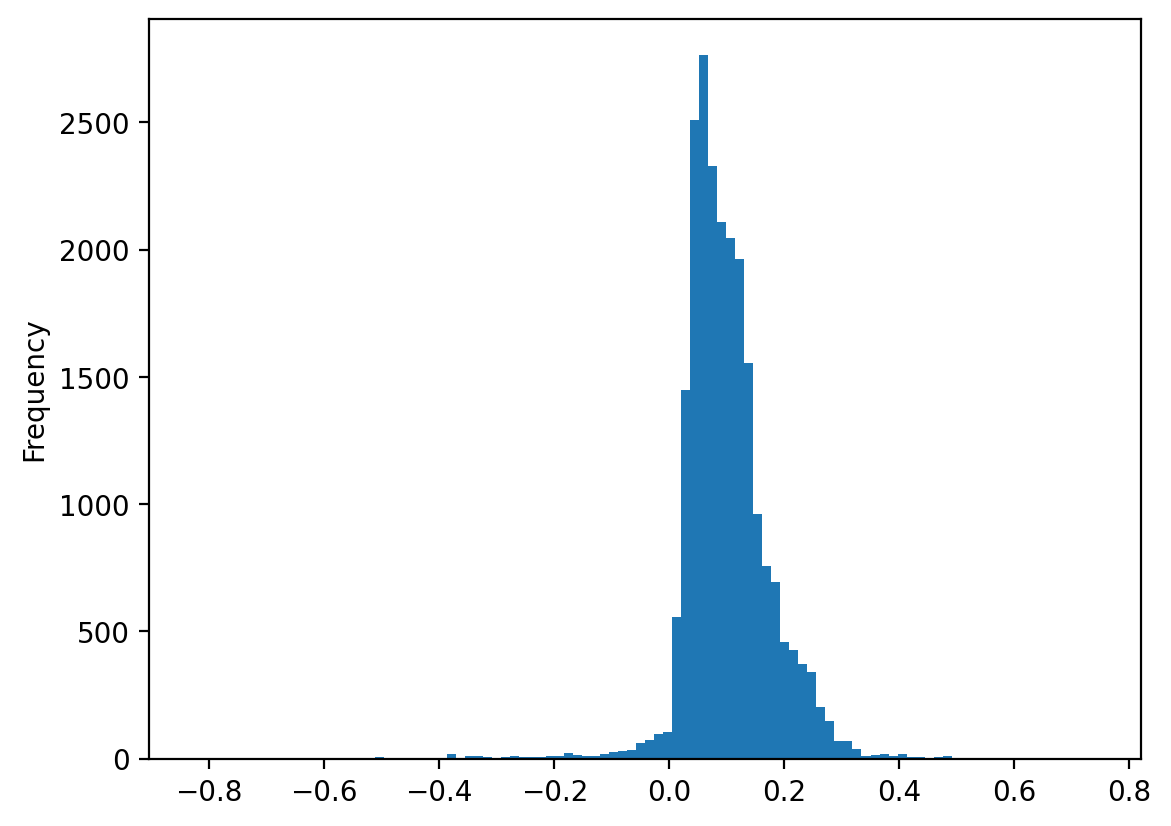

In [15]:
data.fund_return_3years.plot.hist(bins=100);

In [16]:
data.fund_return_3years.mean()

0.09961889051224156

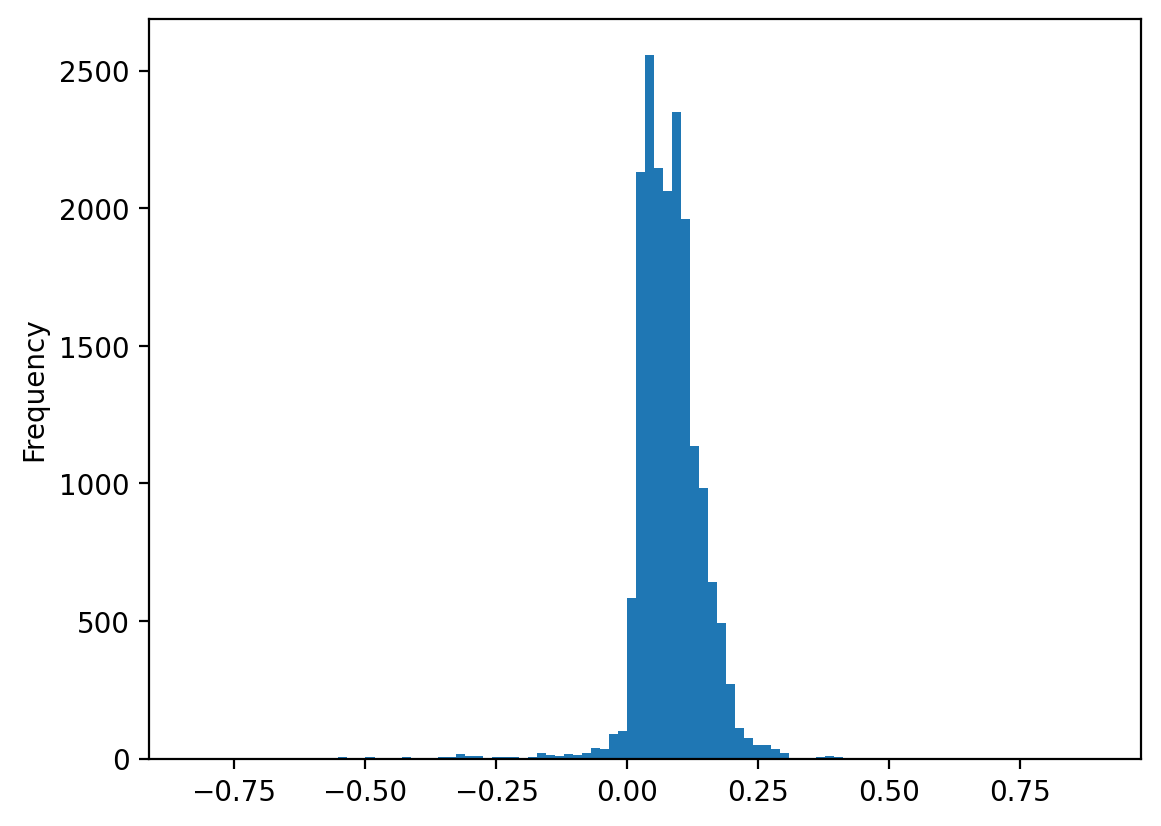

In [17]:
data.fund_return_5years.plot.hist(bins=100);

In [18]:
data.fund_return_5years.mean()

0.08126349154782225

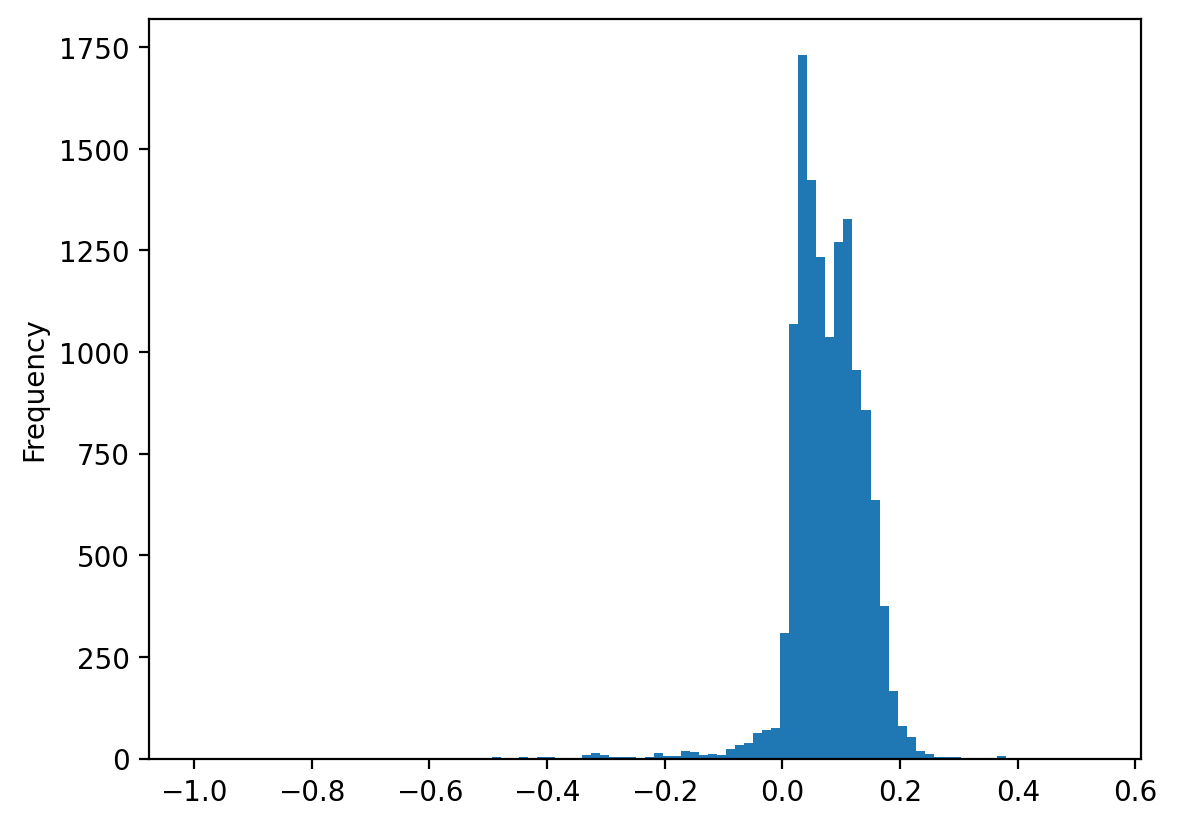

In [19]:
data.fund_return_10years.plot.hist(bins=100);

In [20]:
data.fund_return_10years.mean()

0.07820446480601134

The return seems to be annulized return, and the average return seems to be decreasing when we increase the time horizon. This is possbily due to survivorship bias: Funds that survive longer tends to be more cautious, thus generates smaller return.

# Market Risks and Returns

A basic model to explain asset return is the Capital Asset Pricing Model with the following form:

$$
R_{i} = \alpha_i + \beta_i  R_{m}
$$

Where $R_{i}$ is the fund return and $R_{m}$ is the market return captured by market index. $\alpha_i$ and $\beta_i$ are parameters. If a fund's price is more volatile than the market, $\beta_i$ is larger than 1. If a fund's price is less volatile than the market, $\beta_i$ is smaller than 1. We expect the return should be adjusted according to the $\beta_i$. If a fund's return generated more than its market risk, than it has a positive $\alpha$.

0.9438584633160022

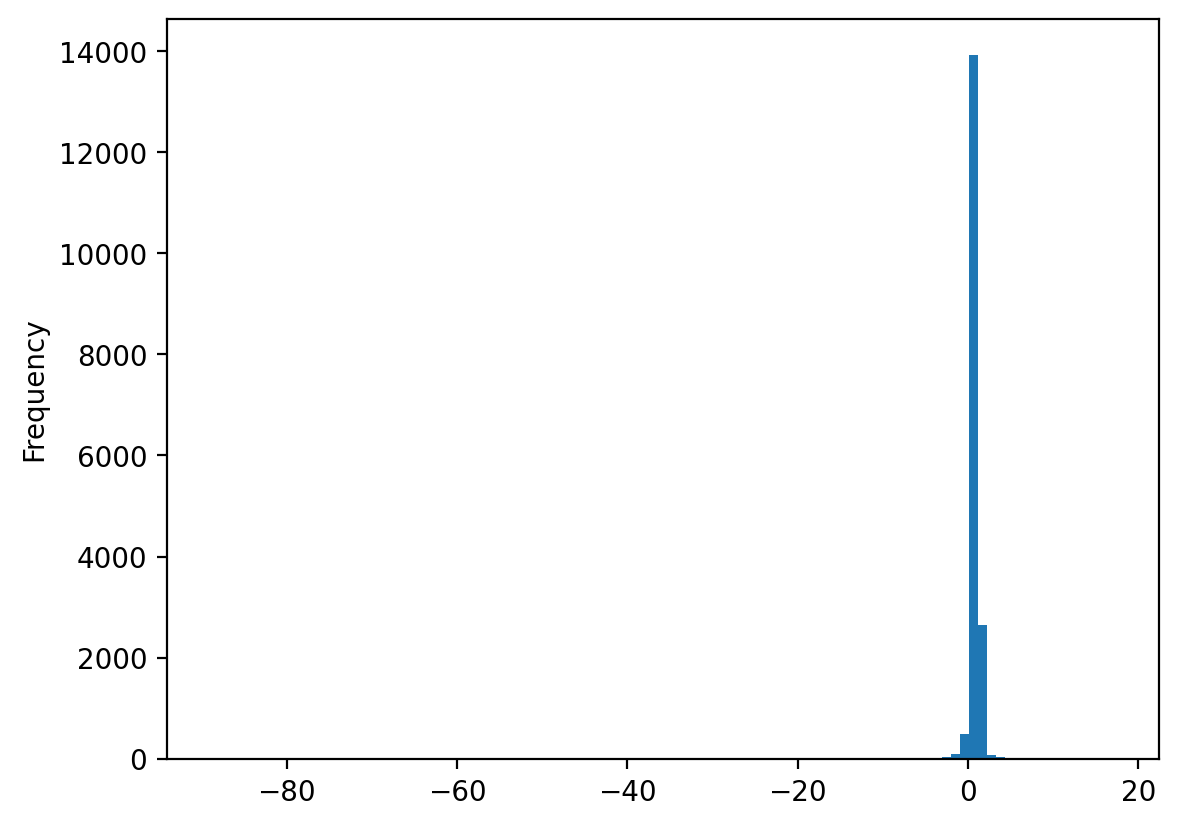

In [21]:
data.fund_beta_10years.plot.hist(bins=100)
data.fund_beta_10years.mean()

0.947849745639535

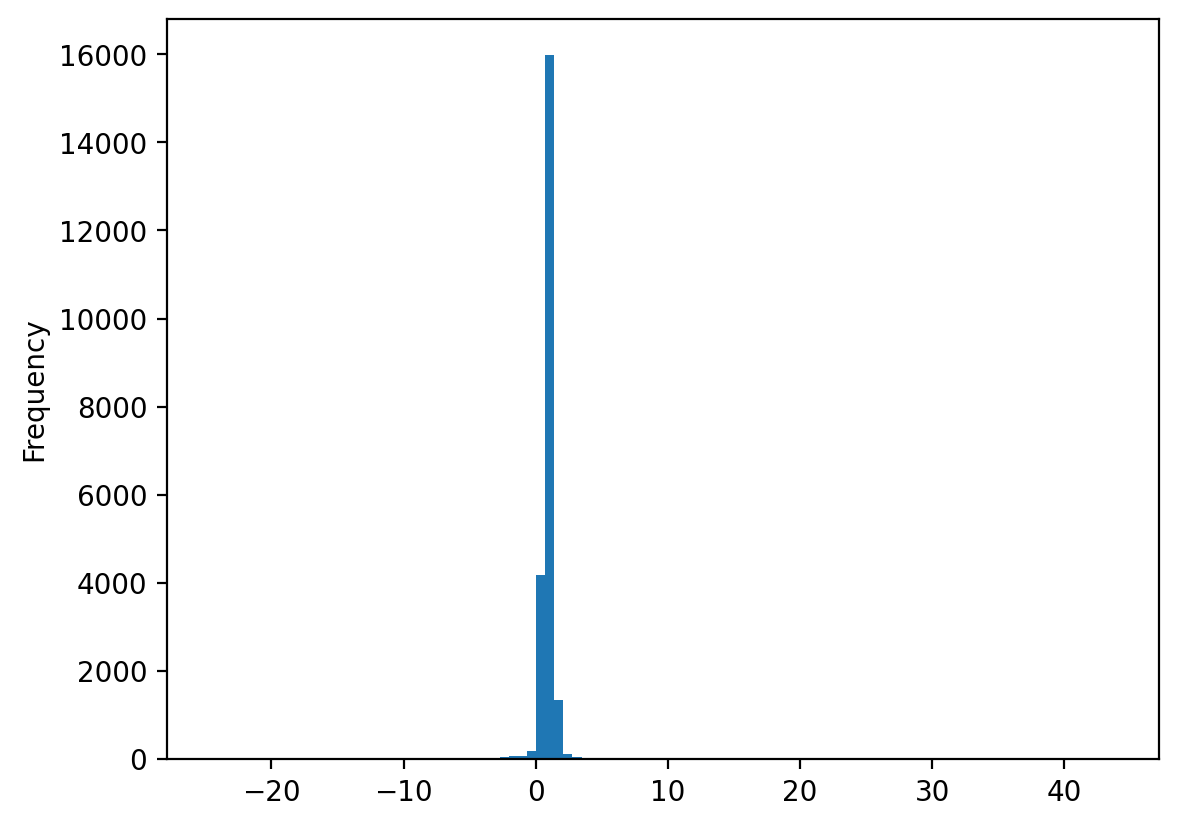

In [22]:
data.fund_beta_5years.plot.hist(bins=100);
data.fund_beta_5years.mean()

0.9677529471630905

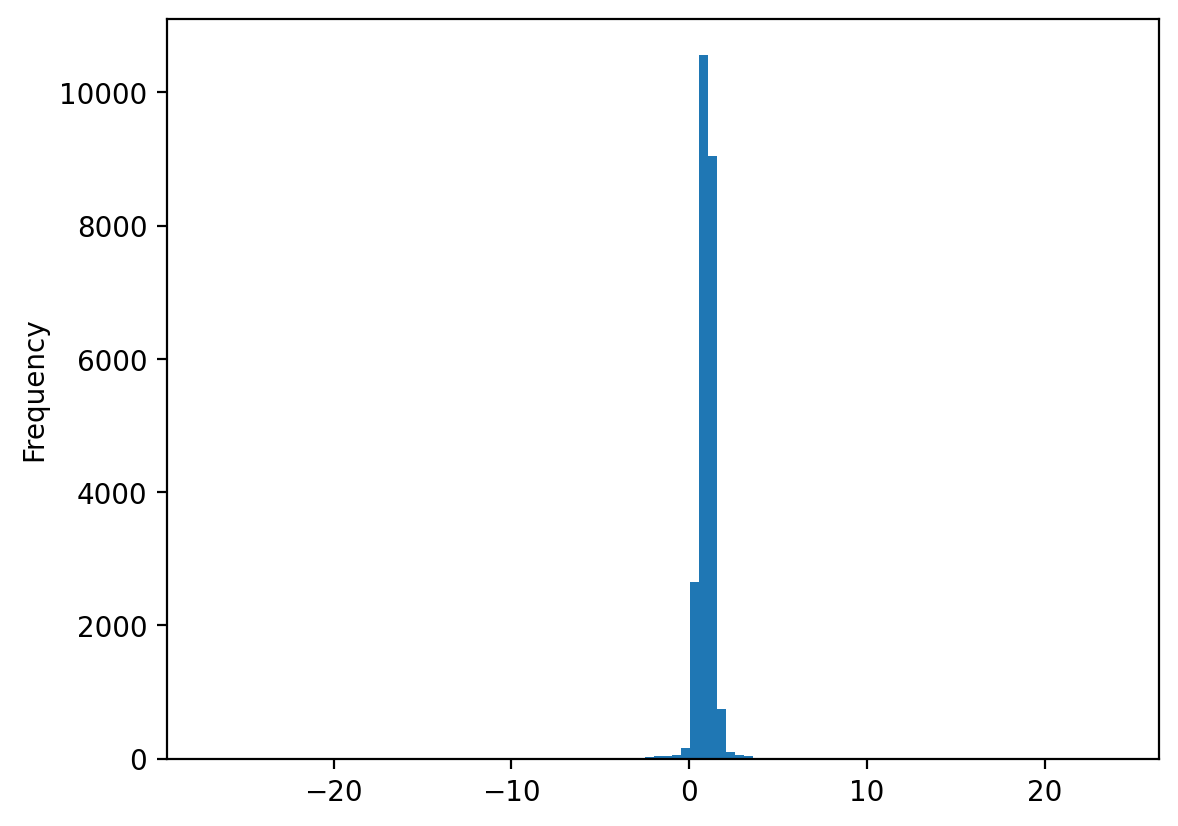

In [23]:
data.fund_beta_3years.plot.hist(bins=100);
data.fund_beta_3years.mean()

Most funds are capturing market risks, resulting in $β \approx 1$.

-0.7366985008971466

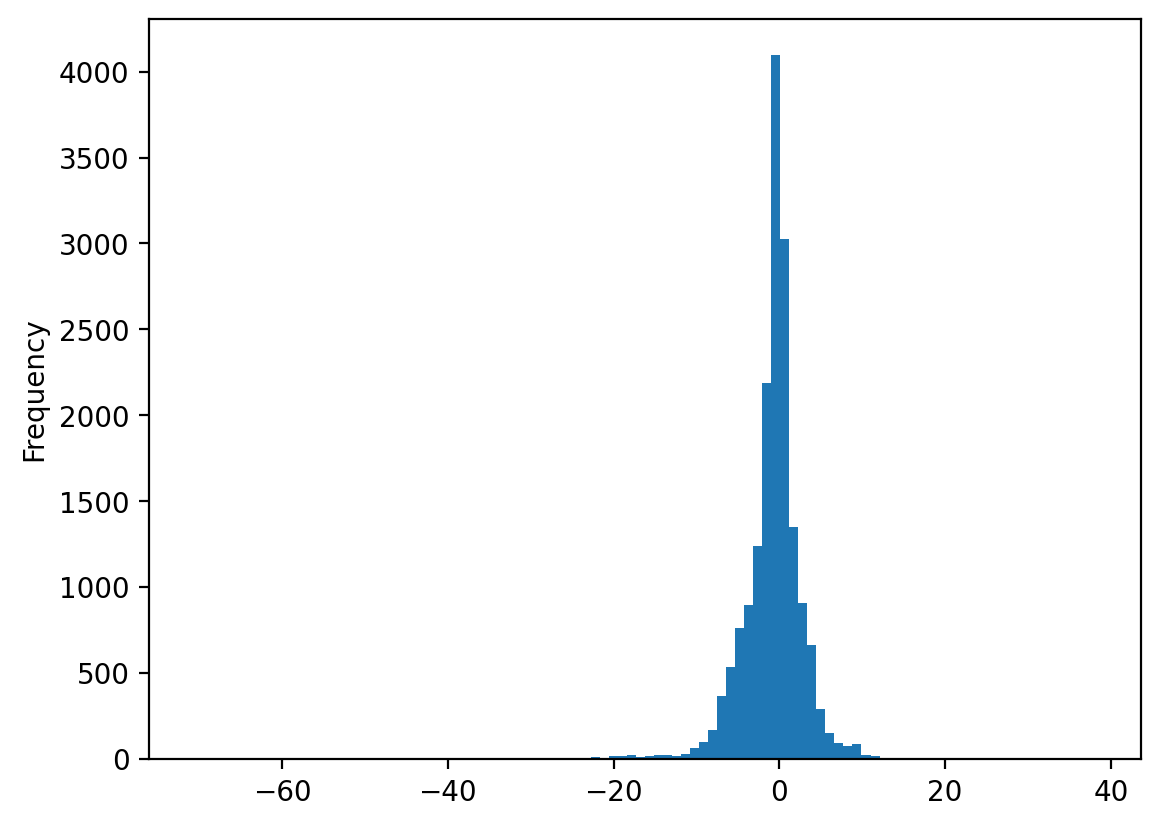

In [24]:
data.fund_alpha_10years.plot.hist(bins=100)
data.fund_alpha_10years.mean()

-0.7144464659328663

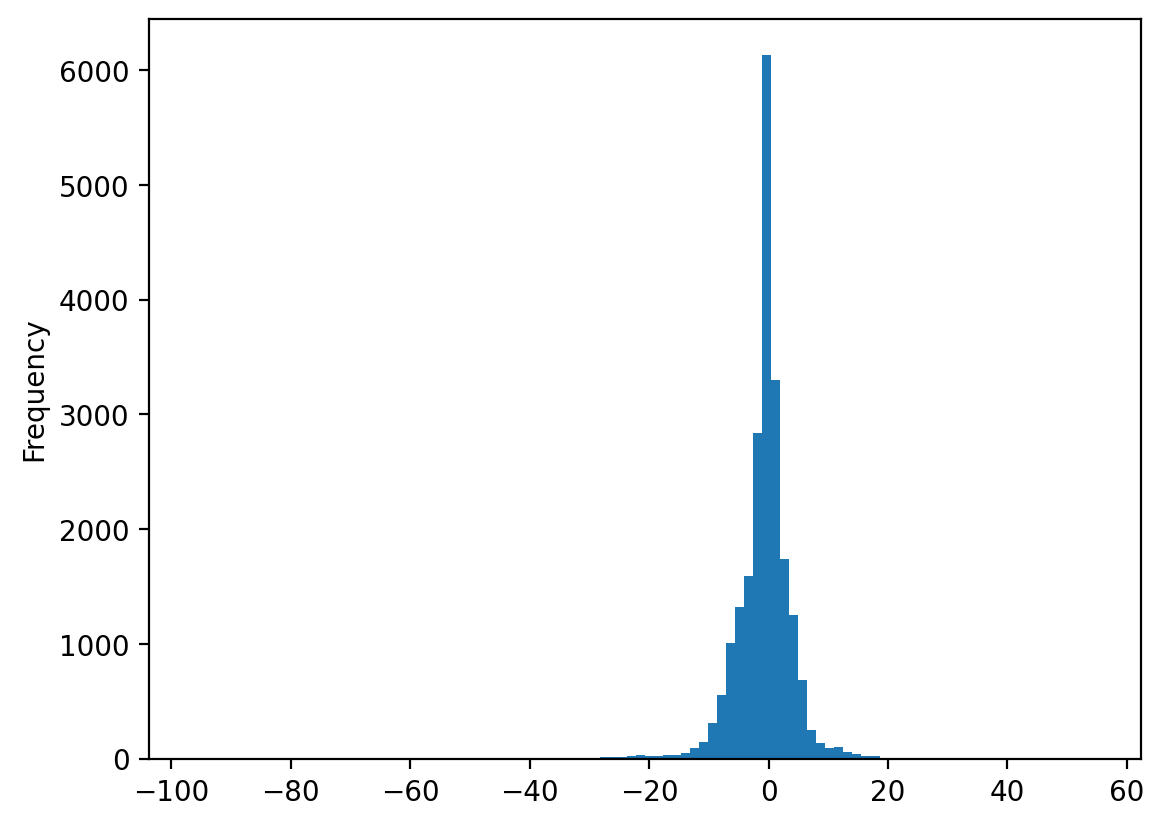

In [25]:
data.fund_alpha_5years.plot.hist(bins=100)
data.fund_alpha_5years.mean()

-1.1624351187189397

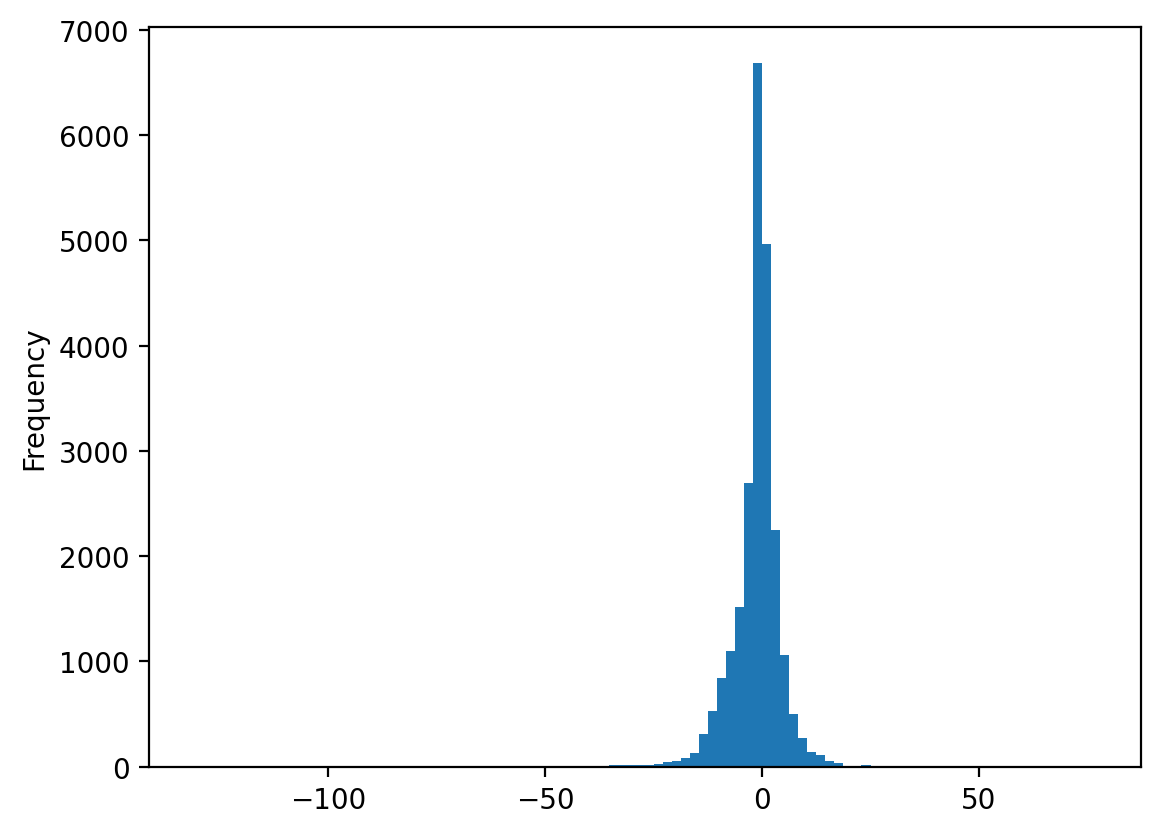

In [26]:
data.fund_alpha_3years.plot.hist(bins=100)
data.fund_alpha_3years.mean()

Most funds do not generate return alpha, meaning that their performances are worse than market returns.

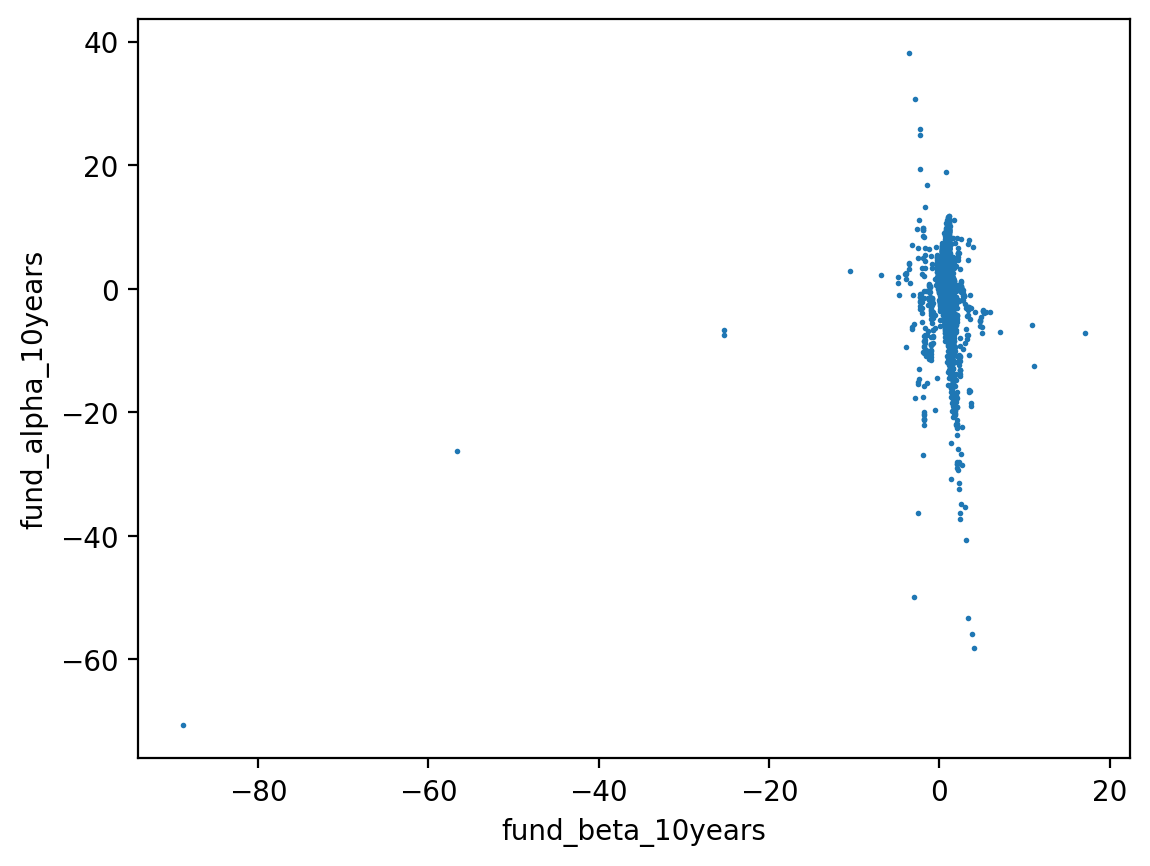

In [31]:
data.loc[:, ["fund_beta_10years", "fund_alpha_10years", "quote_type"]].plot.scatter(
    x="fund_beta_10years", y="fund_alpha_10years", size=1
);

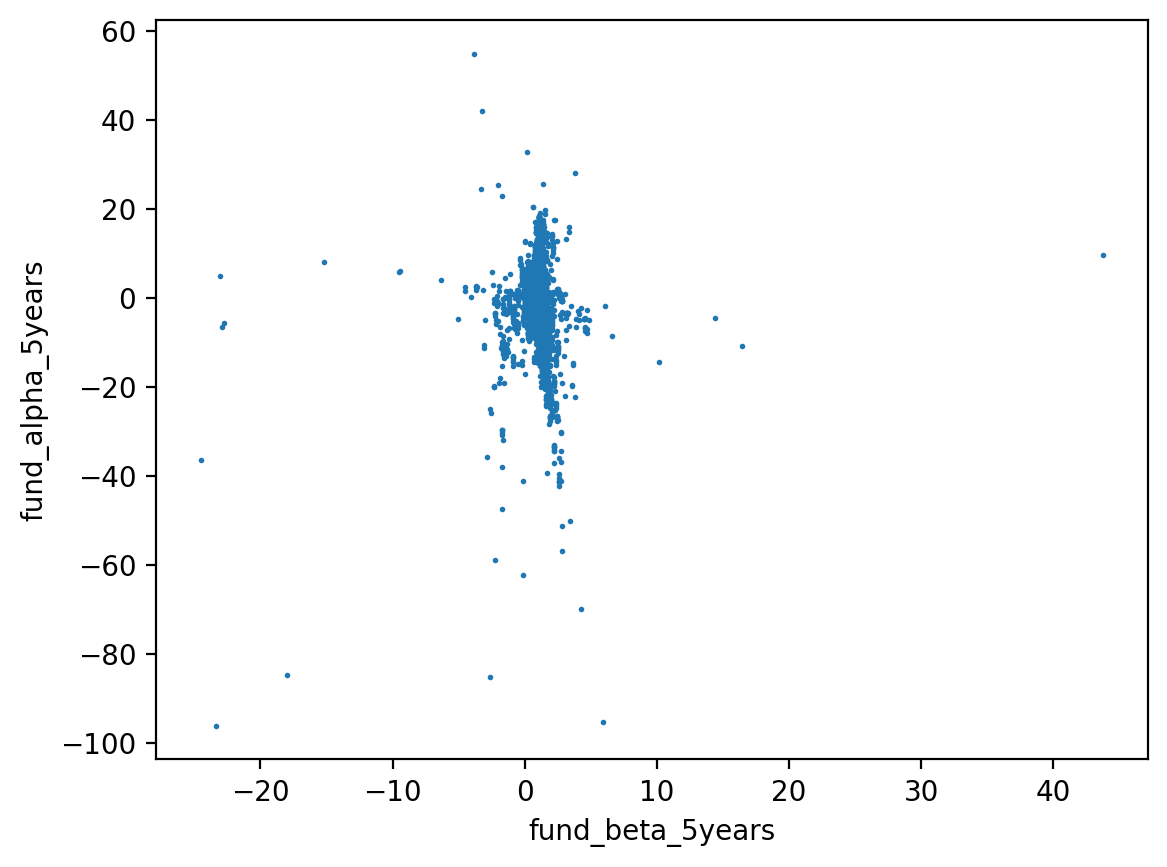

In [32]:
data.loc[:, ["fund_beta_5years", "fund_alpha_5years", "quote_type"]].plot.scatter(
    x="fund_beta_5years", y="fund_alpha_5years", size=1
);

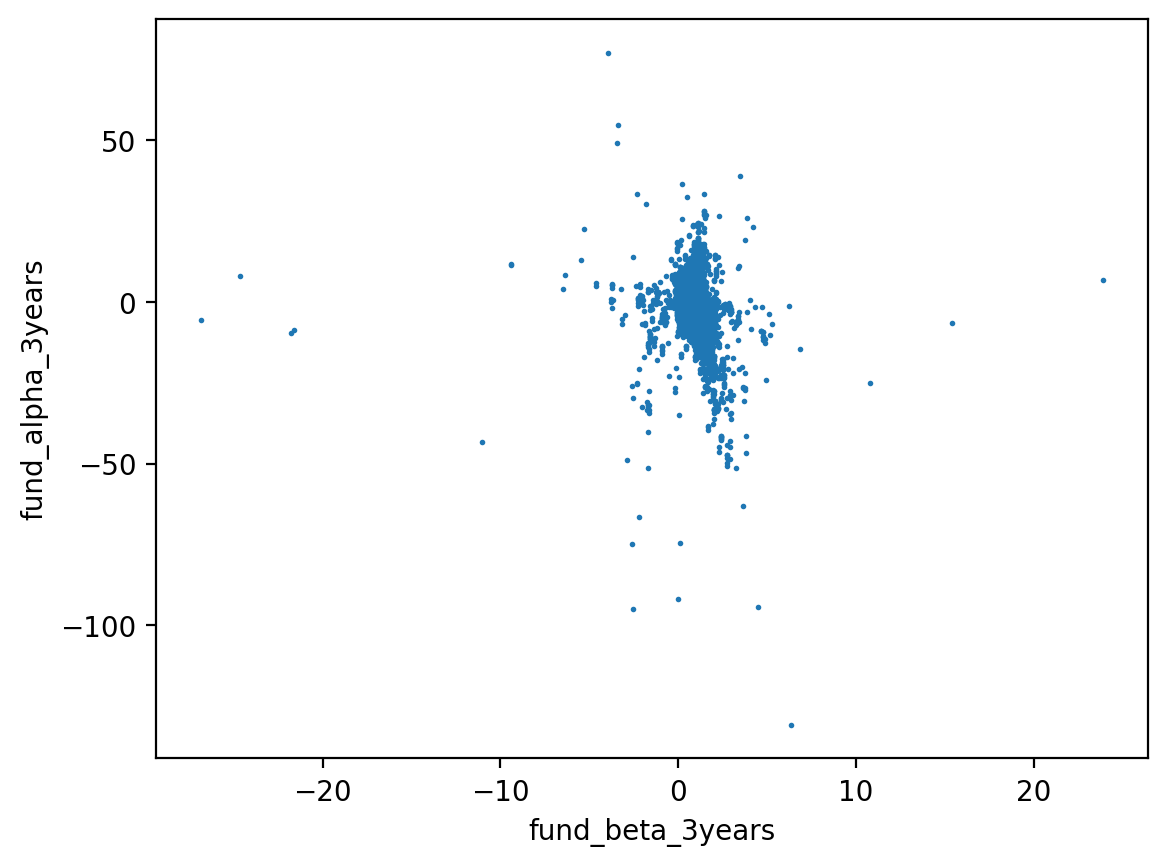

In [27]:
data.loc[:, ["fund_beta_3years", "fund_alpha_3years", "quote_type"]].plot.scatter(
    x="fund_beta_3years", y="fund_alpha_3years", size=1
);

## Risk-Return Trade-Off

Apart from market risks, many other risk factors should also be considered. The total risk is reflected by the standard deviation of the price. We expect that more risk leads to more reward, thus results in a risk-return trade-off.

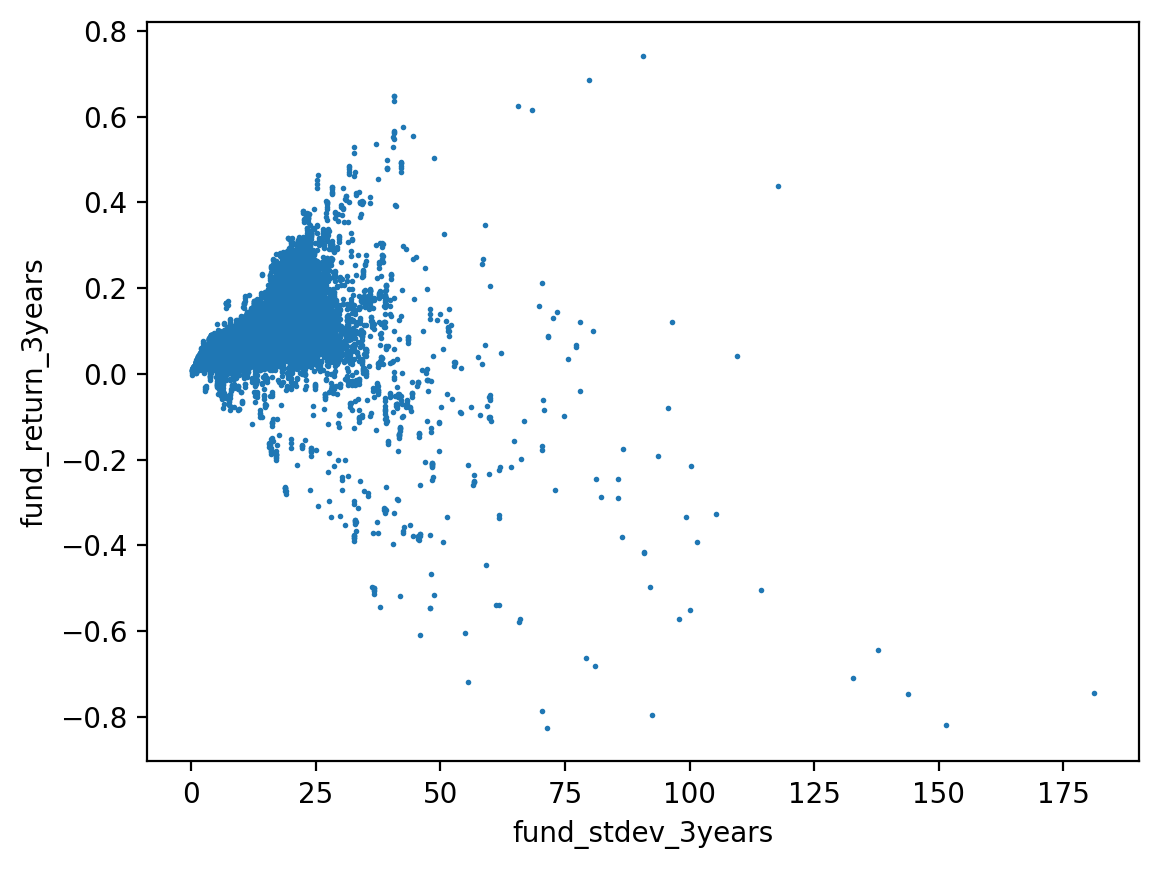

In [35]:
data.loc[:, ["fund_stdev_3years", "fund_return_3years", "quote_type"]].plot.scatter(
    x="fund_stdev_3years", y="fund_return_3years", size=1
);

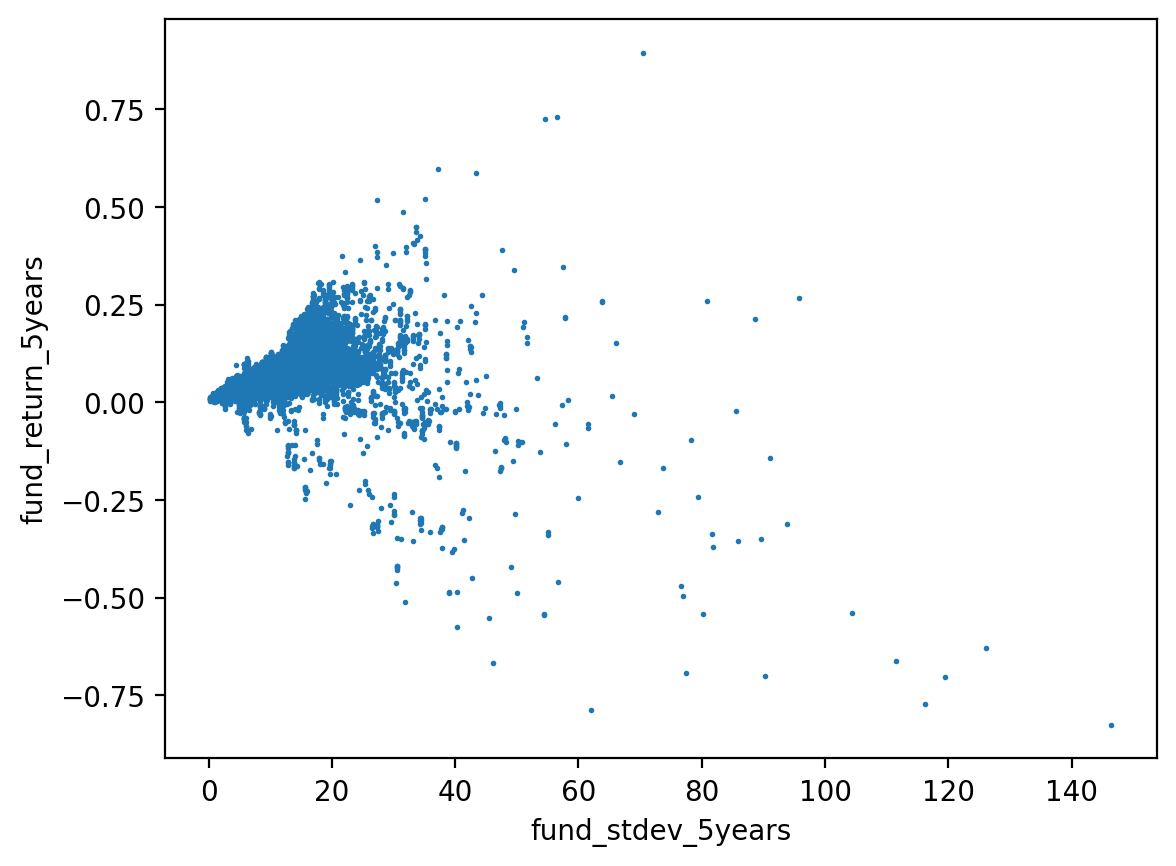

In [36]:
data.loc[:, ["fund_stdev_5years", "fund_return_5years", "quote_type"]].plot.scatter(
    x="fund_stdev_5years", y="fund_return_5years", size=1
);

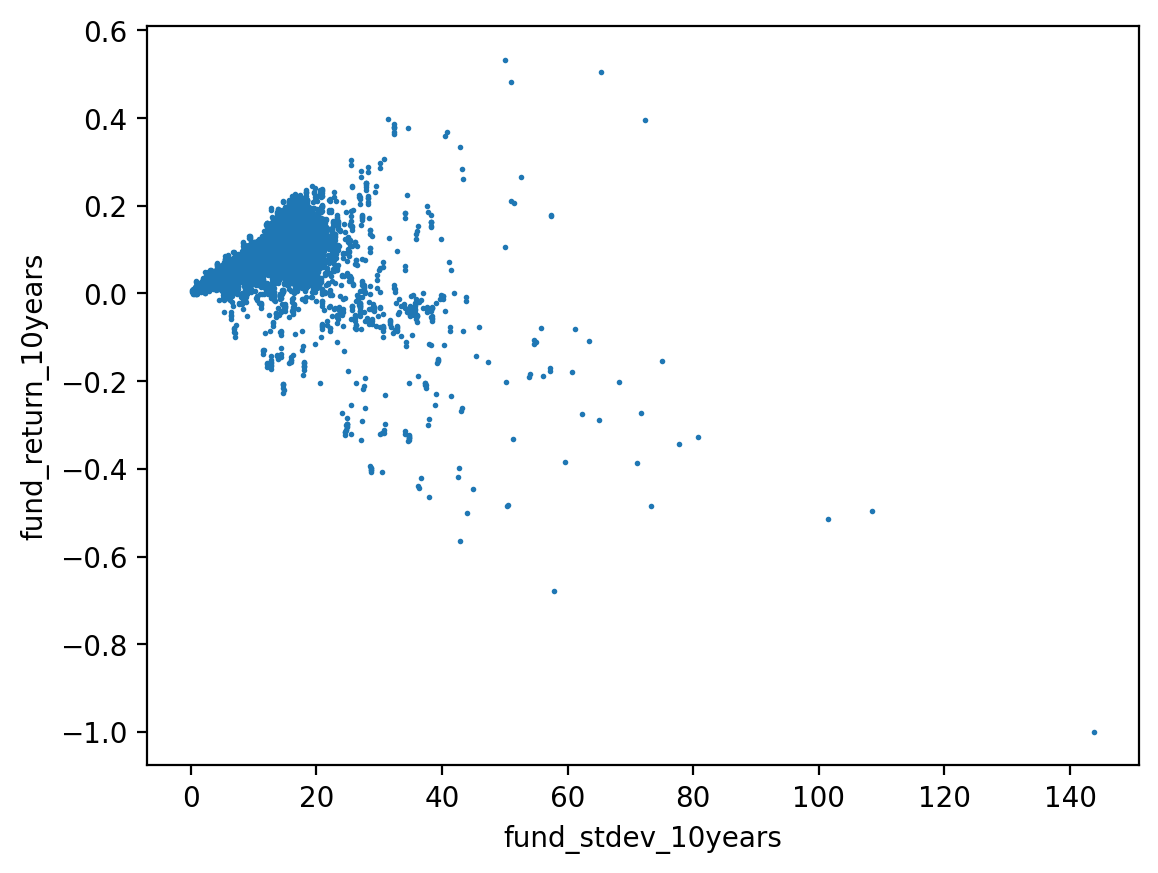

In [37]:
data.loc[:, ["fund_stdev_10years", "fund_return_10years", "quote_type"]].plot.scatter(
    x="fund_stdev_10years", y="fund_return_10years", size=1
);

We can see most funds have positive risk and return and there is a trend that higher risks leads to higer returns. But some funds certainly do better than others.

## The Problem

We did some basic exploration on the dataset and gained some intuitions of the data. The problem we identify is that lots of funds underperform the market index and do not offer attractive returns given the risks they take. We need a data solution to help us select funds that suit investor's risk preference and generate good risk-adjusted returns.